# Load BRW Data (Bodenrichtwerte)
In this notebook we load and preprocess the OSM data and save in in the data directory

In [1]:
%load_ext autoreload
%autoreload 2
# %autoawait asyncio

In [2]:
%cd ..

d:\hex2vec2


## Load raw data from folder
The BRW data for NRW can be downloaded here: https://www.boris.nrw.de/boris-nrw/?lang=de

In [3]:
# import geopandas as gpd
from src.data.load_data import load_brw

In [4]:
cities = [
    "Cologne, Germany",
    "Dortmund, Germany",
    "Duesseldorf, Germany",
    "Essen, Germany",
    "Duisburg, Germany",
    "Bochum, Germany",
    "Wuppertal, Germany",
    "Bielefeld, Germany",
    "Bonn, Germany",
    "Muenster, Germany"
    ]

cities_german = [
    "Köln",
    "Dortmund",
    "Düsseldorf",
    "Essen",
    "Duisburg",
    "Bochum",
    "Wuppertal",
    "Bielefeld",
    "Bonn",
    "Münster"
]

In [13]:
gdf_dic = {}
for city, city_german in zip(cities, cities_german):
    gdf_dic[city] = load_brw(city = city_german, only_residential = True)

## Visualize land prices

In [14]:
from src.analytics.visualization import plot_map

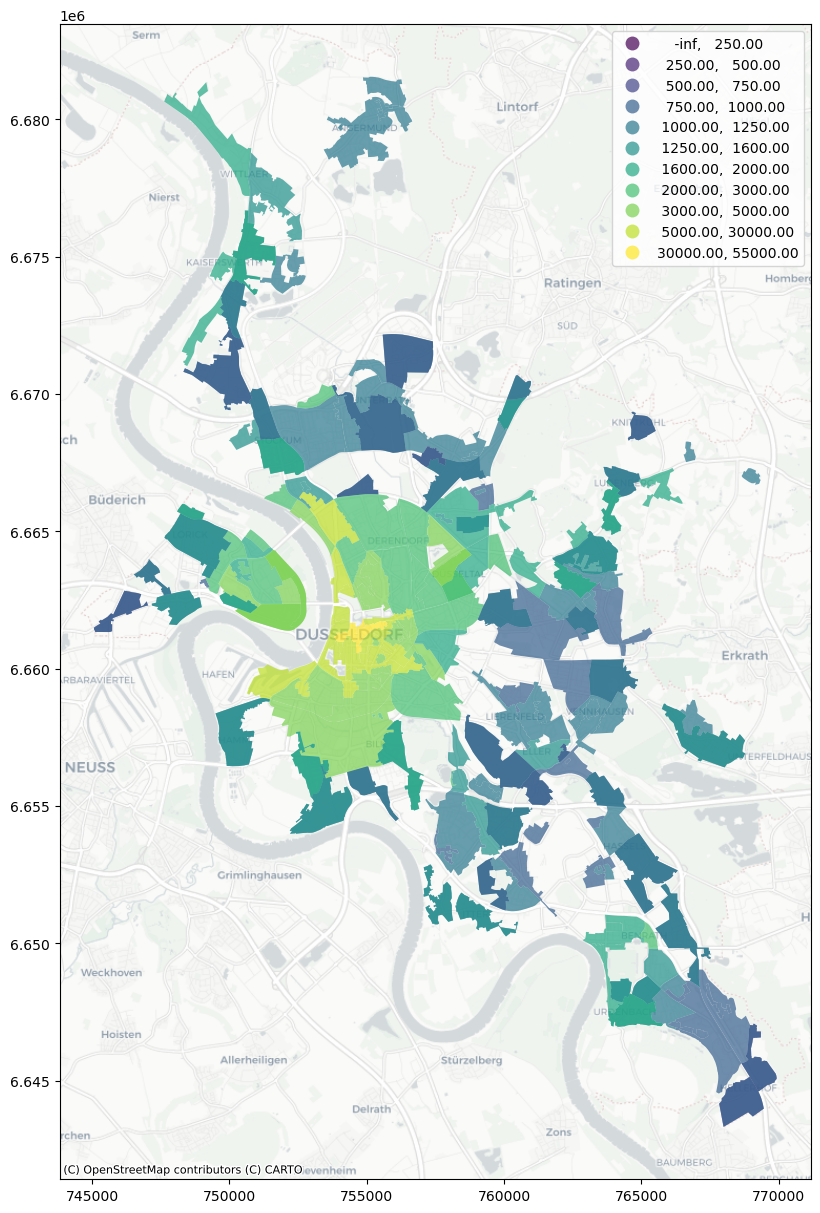

In [15]:
# here are the land prices for Düsseldorf
gdf_duss = gdf_dic["Duesseldorf, Germany"]

plot_map(gdf_duss, "BRW", bins = [250, 500, 750, 1000, 1250, 1600, 2000, 3000, 5000, 30000])

## Turn data into a hex map
Next we want to turn the land price map into a hex map. Therefore we assign to each hexagon the land price of that property that has the biggest overlap.

In [16]:
from src.data.make_dataset import polygon_to_h3

In [17]:
RESOLUTION = 9

In [18]:
import warnings
warnings.simplefilter('ignore')

hex_dic = {}
for city in cities:
    hex_dic[city] = polygon_to_h3(gdf_dic[city], city, RESOLUTION)

warnings.resetwarnings()

## Visualize hex map

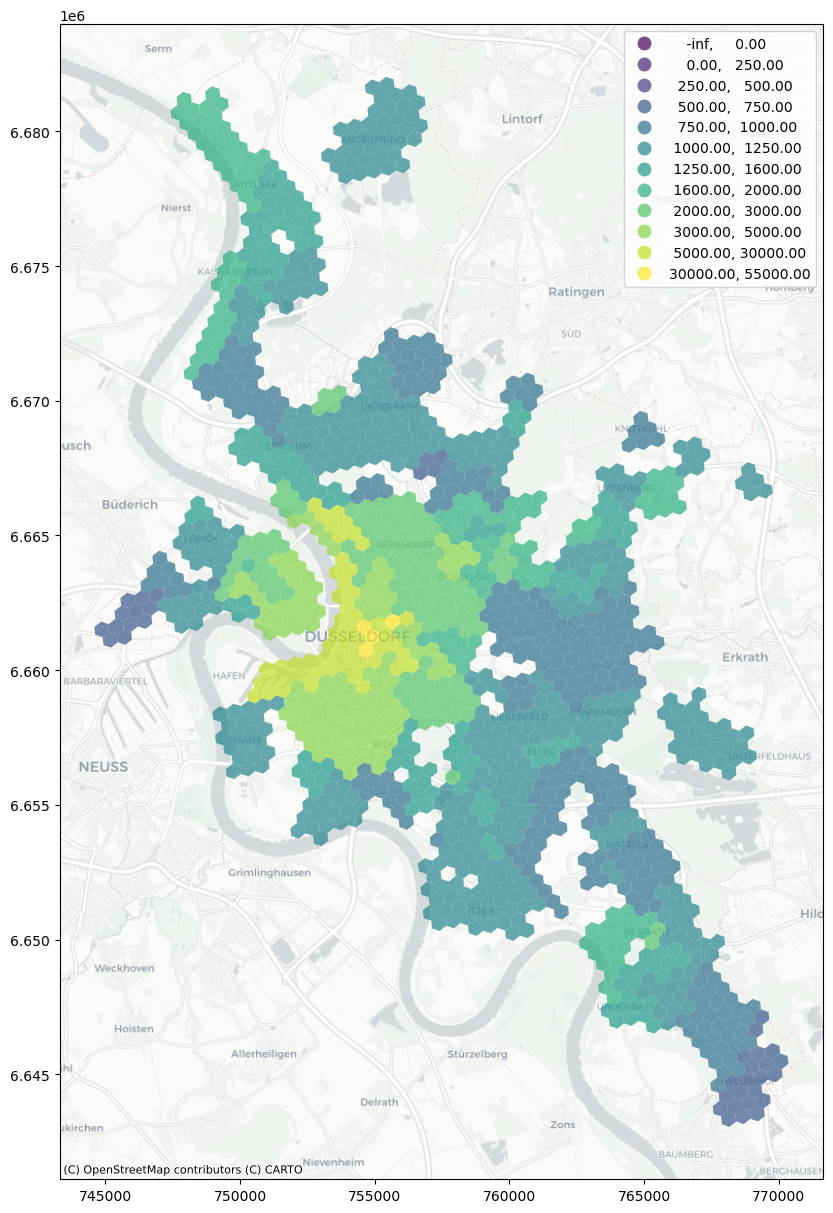

In [19]:
hex_duss = hex_dic["Duesseldorf, Germany"]
plot_map(hex_duss, "BRW", bins = [0, 250, 500, 750, 1000, 1250, 1600, 2000, 3000, 5000, 30000])

## Add Population and GDP to the data
We later want to predict the land prices using the hex2vec encodings. Since land prices heavily depend on the city (especially size and gdp) we add this information to the data and will use it as input data for the predicting model.

In [20]:
from src.data.make_dataset import concat
import numpy as np
import pandas as pd

In [21]:
popul = { #population in thousands
    "Cologne, Germany": 1073,
    "Dortmund, Germany": 587,
    "Duesseldorf, Germany": 619,
    "Essen, Germany": 579,
    "Duisburg, Germany": 495,
    "Bochum, Germany": 363,
    "Wuppertal, Germany": 355,
    "Bielefeld, Germany": 334,
    "Bonn, Germany": 332,
    "Muenster, Germany": 318
}

gdp = { #gross domestic product per person in thousand EUR
    "Cologne, Germany": 59.6,
    "Dortmund, Germany": 38.5,
    "Duesseldorf, Germany": 81.6,
    "Essen, Germany": 43.4,
    "Duisburg, Germany": 36.5,
    "Bochum, Germany": 33,
    "Wuppertal, Germany": 36,
    "Bielefeld, Germany": 41,
    "Bonn, Germany": 80.3,
    "Muenster, Germany": 55
}

In [22]:
for city in cities:
    hex_dic[city]["popul"] = popul[city]
    hex_dic[city]["gdp"] = gdp[city]

In [23]:
# We also compute the median land price for each city to make some comparisons later
for city in hex_dic:
    hex_dic[city]["median"] = np.median(hex_dic[city].BRW)
    #hex_dic[city]["relative"] = (hex_dic[city].BRW - np.median(hex_dic[city].BRW))/np.median(hex_dic[city].BRW)

## Group all cities in one dataframe and save it

In [24]:
# this function saves the dataframe
df_concat = concat(hex_dic)
df_concat

,h3,geometry,BRW,popul,gdp,median
h3,,,,,,
891fa199b57ffff,891fa199b57ffff,"POLYGON ((6.94145 50.91990, 6.94172 50.91826, ...",1250.0,1073,59.6,1060.0
891fa19938bffff,891fa19938bffff,"POLYGON ((6.85668 50.93490, 6.85695 50.93326, ...",2820.0,1073,59.6,1060.0
891fa181663ffff,891fa181663ffff,"POLYGON ((7.04591 50.96229, 7.04618 50.96065, ...",750.0,1073,59.6,1060.0
891fa1d4d23ffff,891fa1d4d23ffff,"POLYGON ((6.91911 50.86459, 6.91938 50.86295, ...",580.0,1073,59.6,1060.0
891fa18a123ffff,891fa18a123ffff,"POLYGON ((7.06024 50.93390, 7.06051 50.93226, ...",1100.0,1073,59.6,1060.0
...,...,...,...,...,...,...
891f129aabbffff,891f129aabbffff,"POLYGON ((7.64203 51.94899, 7.64229 51.94737, ...",850.0,318,55.0,670.0
891f129a527ffff,891f129a527ffff,"POLYGON ((7.59626 51.98836, 7.59652 51.98674, ...",650.0,318,55.0,670.0
891f129b02fffff,891f129b02fffff,"POLYGON ((7.51765 51.92515, 7.51791 51.92353, ...",540.0,318,55.0,670.0
